<a href="https://colab.research.google.com/github/FatmaNjaah88/FatmaNjaah88/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
import sklearn as skl
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [111]:
from google.colab import files

uploaded = files.upload()
import pandas as pd
import io

Customer_Churn = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling_dirty.csv']))
Customer_Churn.head()

Saving Churn_Modelling_dirty.csv to Churn_Modelling_dirty.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,NaN,France,Female,42.0,2,0.00,1,1,1,NaN,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,NaN,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,NaN,2,NaN,1,1,1,79084.10,0


## Data Wrangling.
### * Data Cleaning.
### * Handling Missing Values & outliers.
### * Handling Inconsistances

In [112]:
Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      7283 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              7286 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          7305 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  7285 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


### نطلعها في شكل اشيك

In [113]:
Customer_Churn.isna().sum().to_frame().rename(columns={0:"NumOfNullValues"})

,NumOfNullValues
RowNumber,0
CustomerId,0
Surname,0
CreditScore,2717
Geography,0
Gender,0
Age,2714
Tenure,0
Balance,2695
NumOfProducts,0


In [114]:
Customer_Churn.duplicated().sum()

np.int64(0)

### محتاجين نتعامل مع ال nulls
## Handling the Missing values

In [115]:
# Customer_Churn["CreditScore"].fillna(Customer_Churn["CreditScore"].mean())
# Customer_Churn["Age"].fillna(Customer_Churn["Age"].mean())
# Customer_Churn["Balance"].fillna(Customer_Churn["Balance"].mean())
# Customer_Churn["EstimatedSalary"].fillna(Customer_Churn["EstimatedSalary"].mean())

ColsWithNulls=Customer_Churn[["CreditScore","Age","Balance","EstimatedSalary"]]
#ColsWithNulls
for col in ColsWithNulls:
   ColsWithNulls[col].fillna(ColsWithNulls[col].mean(),inplace=True)


ColsWithNulls.isna().sum().to_frame().rename(columns={0:"NumOfNullValues"})

,NumOfNullValues
CreditScore,0
Age,0
Balance,0
EstimatedSalary,0


In [116]:
Customer_Churn[["CreditScore","Age","Balance","EstimatedSalary"]]=ColsWithNulls

In [117]:
Customer_Churn.isna().sum().to_frame().rename(columns={0:"NumOfNullValues"})

,NumOfNullValues
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [118]:
Customer_Churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,649.291913,38.900082,5.012800,1.856229e+05,1.530200,0.70550,0.515100,100441.070469,0.203700
std,2886.89568,7.193619e+04,82.868541,8.928174,2.892174,5.098293e+05,0.581654,0.45584,0.499797,48906.509365,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,609.000000,34.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,69402.290000,0.000000
50%,5000.50000,1.569074e+07,649.291913,38.900082,5.000000,1.224863e+05,1.000000,1.00000,1.000000,100441.070469,0.000000
75%,7500.25000,1.575323e+07,690.000000,41.000000,7.000000,1.856229e+05,2.000000,1.00000,1.000000,131300.945000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,5.555811e+06,4.000000,1.00000,1.000000,199970.740000,1.000000


In [119]:
Customer_Churn.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,4,France,4762
Gender,10000,3,Male,5194


In [120]:
Customer_Churn["Balance"].mean()-Customer_Churn["Balance"].median()

np.float64(63136.59027926077)

 ## GAB in mean & median (50%) in Balance فيه
  ### outliers نعمل كشف

<Axes: ylabel='Balance'>

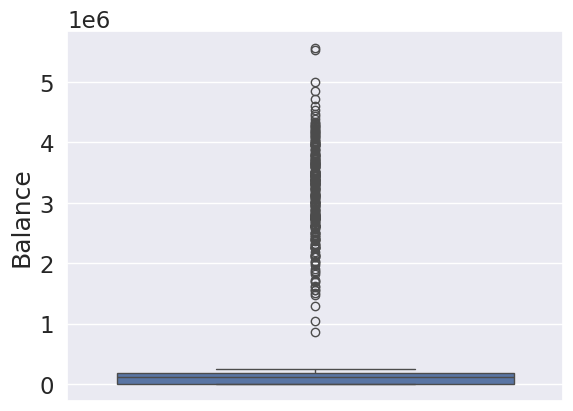

In [121]:
sns.boxplot(Customer_Churn["Balance"])

In [122]:
q1=Customer_Churn['Balance'].quantile(0.25)
q3=Customer_Churn['Balance'].quantile(0.57)
iqr=q3-q1
#outliers
# <q1-1.5*lqr
# >q3+1.5*iqr
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=Customer_Churn[(Customer_Churn['Balance']<lower_bound) | (Customer_Churn['Balance']>upper_bound)]

outliers

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411.000000,France,Male,29.000000,0,1611823.59,2,1,1,53483.210000,0
31,32,15706552,Odinakachukwu,533.000000,France,Male,36.000000,7,2303415.90,1,0,1,156731.910000,0
35,36,15794171,Lombardo,475.000000,France,Female,45.000000,0,3625129.08,1,1,0,27822.990000,1
39,40,15585768,Cameron,649.291913,Germany,Male,41.000000,6,1899435.96,2,0,1,178074.040000,0
80,81,15706021,Buley,665.000000,France,Female,38.900082,1,2609429.58,2,0,0,171413.660000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9696,9697,15638788,Mack,550.000000,France,Male,32.000000,8,2632879.89,1,1,1,199138.840000,0
9731,9732,15627859,Nebeolisa,649.291913,Germany,Male,29.000000,7,2770443.00,1,1,0,163257.440000,0
9753,9754,15705174,Chiedozie,656.000000,Germany,Male,68.000000,7,4145717.97,1,1,1,186574.680000,0
9909,9910,15773338,Endrizzi,649.291913,France,Male,58.000000,2,2742640.56,1,1,1,100441.070469,0


In [123]:
(len(outliers)/Customer_Churn.shape[0])*100

2.6100000000000003

### Handling the outliers

In [124]:
##   نمسحهم 2% بس
# Customer_ChurnCustomer_Churn[~((Customer_Churn['Balance']<lower_bound) | (Customer_Churn['Balance']>upper_bound))]
Customer_Churn=Customer_Churn.drop(outliers.index)

In [125]:
Customer_Churn.shape[0]

9739

In [126]:
Customer_Churn.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3097,3098,15708228,Toscani,476.000000,Germany,Male,38.900082,3,134366.42,1,1,0,68343.53,0
1423,1424,15589221,Kennedy,649.291913,Germany,unknown,30.000000,1,139762.13,2,1,1,23317.88,0
8301,8302,15766017,Brookman,615.000000,Germany,Male,58.000000,3,72309.30,1,1,1,85687.09,1
5011,5012,15609011,Barry,480.000000,Spain,Male,38.900082,8,75408.33,1,1,0,25887.89,1
9148,9149,15595640,Rizzo,649.291913,France,Male,38.900082,8,0.00,2,0,0,145004.39,0


## Detect the unknown values

In [127]:
Str_cols=Customer_Churn.select_dtypes(include="object").columns
Str_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [128]:
cols_With_UnK=[]
for col in Str_cols:
    if (Customer_Churn[col].str.lower()=="unknown").any():
        cols_With_UnK.append(col)

cols_With_UnK



['Geography', 'Gender']

In [129]:
print(Customer_Churn[Customer_Churn["Geography"].str.lower()=="unknown"].shape[0]/Customer_Churn.shape[0]*100)
Customer_Churn[Customer_Churn["Gender"].str.lower()=="unknown"].shape[0]/Customer_Churn.shape[0]*100

5.133997330321388


5.021049389054317

### Replace the "Unknown" values by mode

In [130]:
for col in cols_With_UnK:
    Customer_Churn[col].str.lower()
    Customer_Churn[col].replace("unknown",Customer_Churn[col].mode()[0], inplace=True)


In [131]:
print(Customer_Churn[Customer_Churn["Geography"].str.lower()=="unknown"].shape[0])
Customer_Churn[Customer_Churn["Gender"].str.lower()=="unknown"].shape[0]

0


0

In [132]:
Customer_Churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Detect Inconsistances data

In [133]:
print(Customer_Churn["Geography"].unique())
# Customer_Churn["Gender"].value_counts()
# Customer_Churn["Gender"].unique() # لو عايزه عددهم
print(Customer_Churn["Gender"].unique())
print(Customer_Churn["NumOfProducts"].unique())
print(Customer_Churn["HasCrCard"].unique())
print(Customer_Churn["IsActiveMember"].unique())
print(Customer_Churn["Exited"].unique())
print(Customer_Churn["Tenure"].sort_values().unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]
[ 0  1  2  3  4  5  6  7  8  9 10]


In [134]:
Customer_Churn["Balance"].dtype


dtype('float64')

In [135]:
Num_Inconsist_B=(Customer_Churn["Balance"].astype(str).str.contains(r"[^0-9.]", regex=True).count())-Customer_Churn["Balance"].shape[0]
Num_Inconsist_CS=(Customer_Churn["CreditScore"].astype(str).str.contains(r"[^0-9.]", regex=True).count())-Customer_Churn["CreditScore"].shape[0]
Num_Inconsist_ES=(Customer_Churn["EstimatedSalary"].astype(str).str.contains(r"[^0-9.]", regex=True).count())-Customer_Churn["EstimatedSalary"].shape[0]
Num_Inconsist_Age=(Customer_Churn["Age"].astype(str).str.contains(r"[^0-9.]", regex=True).count())-Customer_Churn["Age"].shape[0]
print("Number the inconsistance data in Balance = "+str( Num_Inconsist_B))
print("Number the inconsistance data in CreditScore = "+str( Num_Inconsist_CS))
print("Number the inconsistance data in EstimatedSalary = "+str( Num_Inconsist_ES))
print("Number the inconsistance data in Age = "+str( Num_Inconsist_Age))

Number the inconsistance data in Balance = 0
Number the inconsistance data in CreditScore = 0
Number the inconsistance data in EstimatedSalary = 0
Number the inconsistance data in Age = 0


# ===========================================

## Exploratory Data Analysis (EDA)
### * Visualizing Dependent Variable.
### * Visualizing Independent Variables.
### * Generating Insight

In [136]:
Independent=Customer_Churn.iloc[:,2:13] # x
Dependent=Customer_Churn.iloc[:,13]     # y

In [137]:
Independent.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,649.291913,France,Female,42.000000,2,0.000000,1,1,1,100441.070469
1,Hill,608.000000,Spain,Female,41.000000,1,83807.860000,1,0,1,112542.580000
2,Onio,502.000000,France,Female,42.000000,8,159660.800000,3,1,0,113931.570000
3,Boni,699.000000,France,Female,39.000000,1,185622.880279,2,0,0,93826.630000
4,Mitchell,850.000000,Spain,Female,38.900082,2,185622.880279,1,1,1,79084.100000


In [138]:
Dependent

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [139]:
Customer_Churn["Exited"].replace({0:"No",1:"Yes"},inplace=True)# علشان الرسمه بس و بعدين نرجعه تاني للمودل

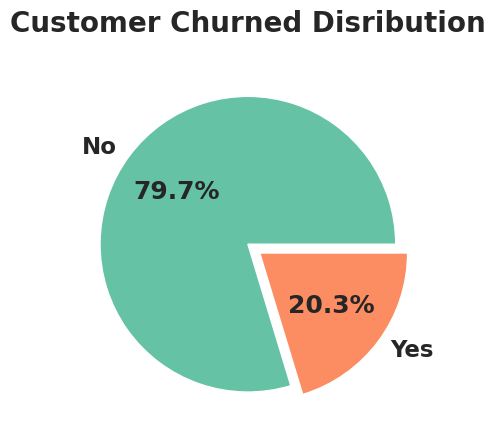

In [140]:
count=Customer_Churn["Exited"].value_counts()
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [141]:
def countplot(column, ax):
    sns.countplot(x=column, data=Customer_Churn, hue="Exited", palette="Set2", ax=ax)

    for value in ax.patches:
        percentage = "{:.2f}%".format(100*value.get_height()/len(Customer_Churn[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="bold", size=12)

    ax.set_title(f"Customer Churned by {column}", fontweight="bold", size=15, pad=10)

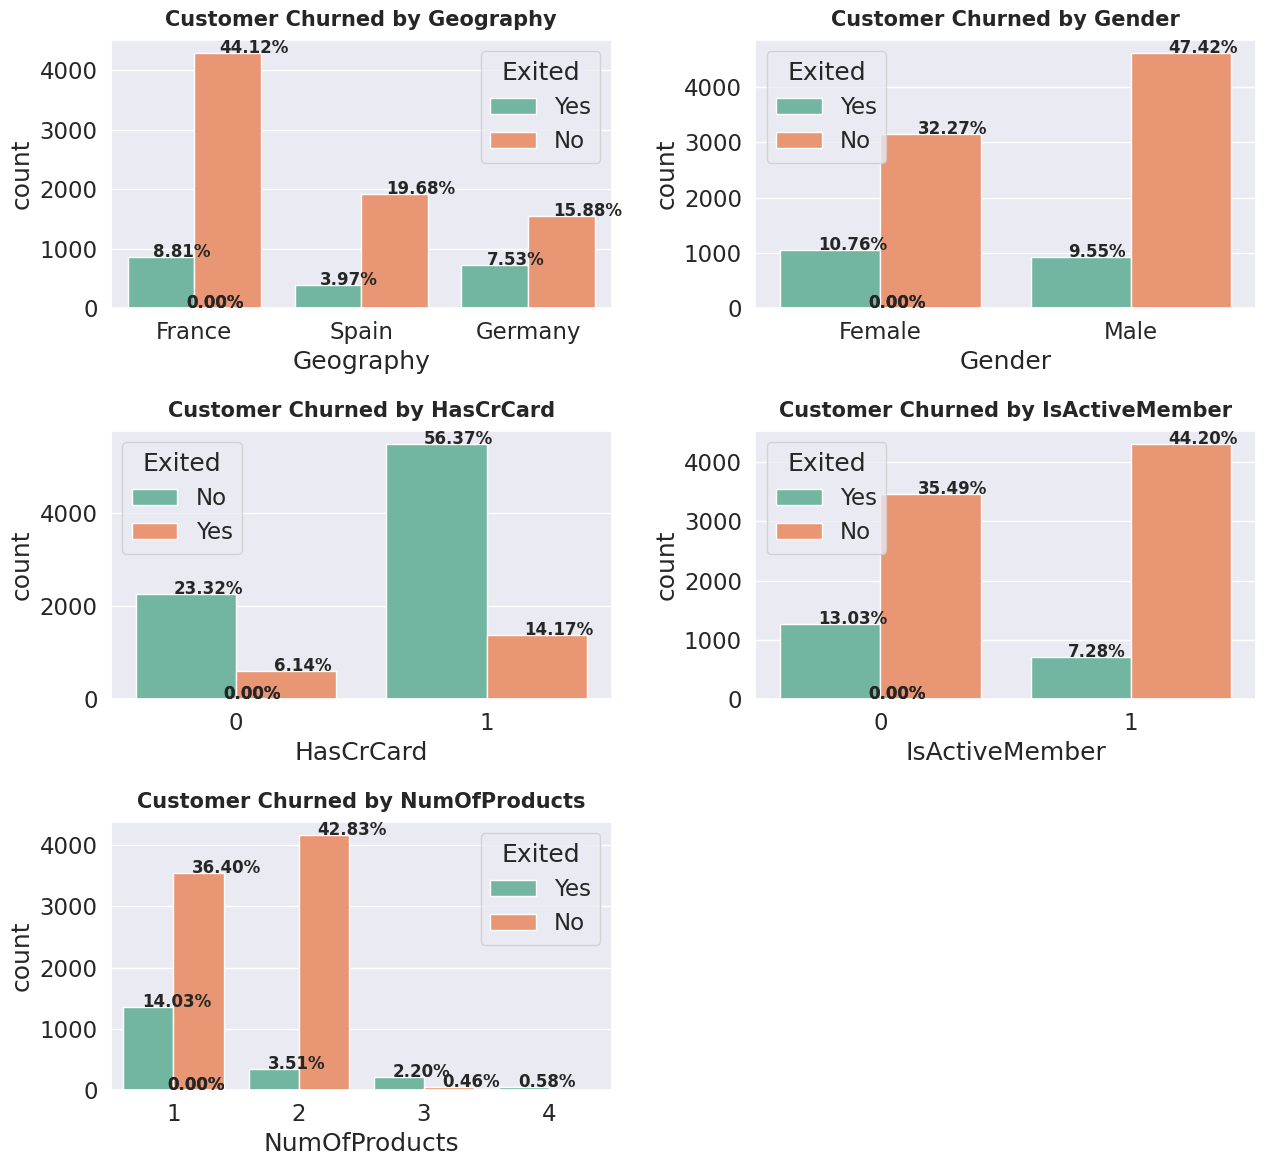

In [142]:
fig, axes = plt.subplots(3, 2, figsize=(13,12))
countplot("Geography",axes[0,0])
countplot("Gender",axes[0,1])
countplot("HasCrCard",axes[1,0])
countplot("IsActiveMember",axes[1,1])
countplot("NumOfProducts",axes[2,0])
axes[2,1].axis('off')

plt.tight_layout()
plt.show()



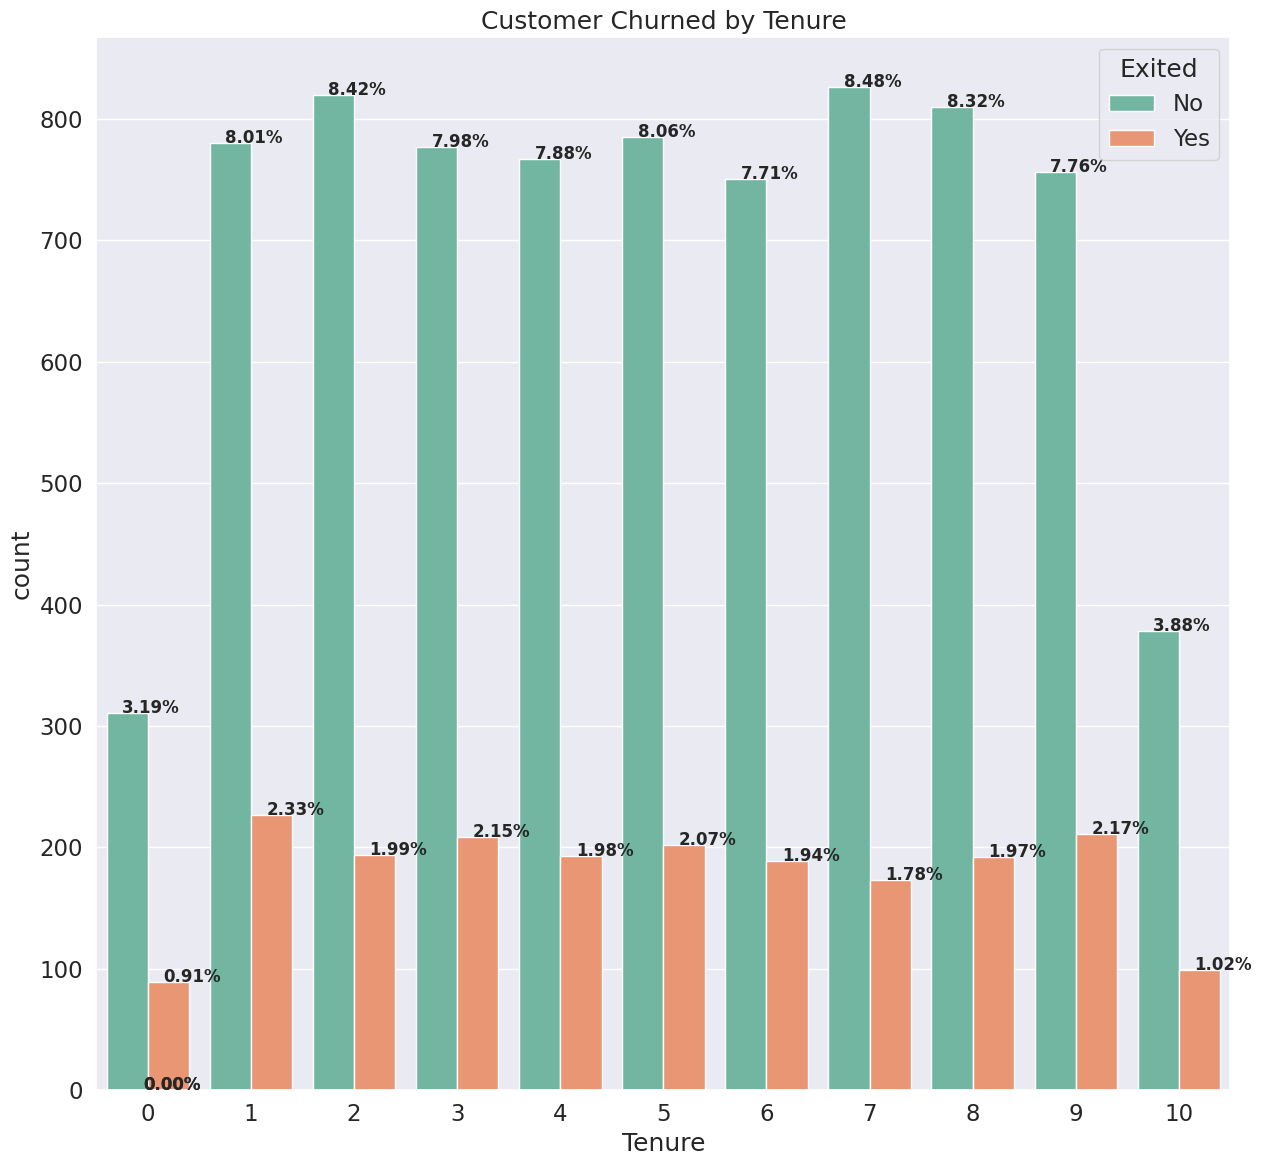

In [143]:
plt.figure(figsize=(13,12))
ax=sns.countplot(x="Tenure",data=Customer_Churn,hue="Exited",palette="Set2")
for value in ax.patches:
  percentage = "{:.2f}%".format(100*value.get_height()/len(Customer_Churn["Tenure"]))
  x = value.get_x() + value.get_width() / 2 - 0.05
  y = value.get_y() + value.get_height()
  ax.annotate(percentage, (x,y), fontweight="bold", size=12)
plt.title("Customer Churned by Tenure")
plt.tight_layout()
plt.show()

In [144]:
def continous_plot(column):
  plt.figure(figsize=(12,6))
  sns.histplot(x=column, data=Customer_Churn, hue="Exited", kde=True,bins=20,palette="Set2")
  plt.xlabel(column,fontweight="black",size=15)
  plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
  plt.tight_layout()
  plt.show()

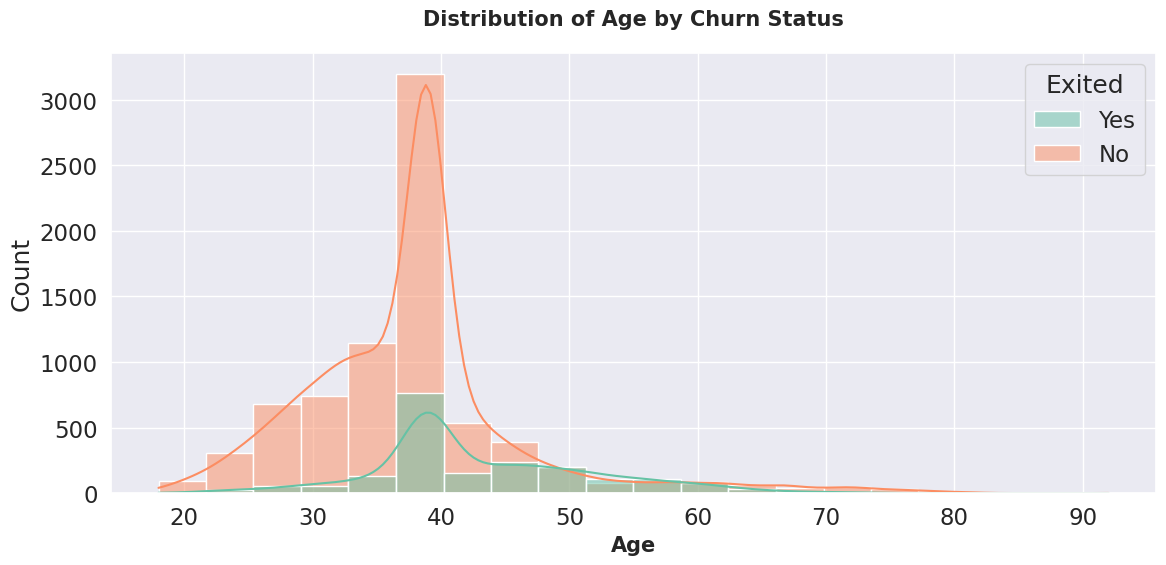

In [145]:
continous_plot("Age")

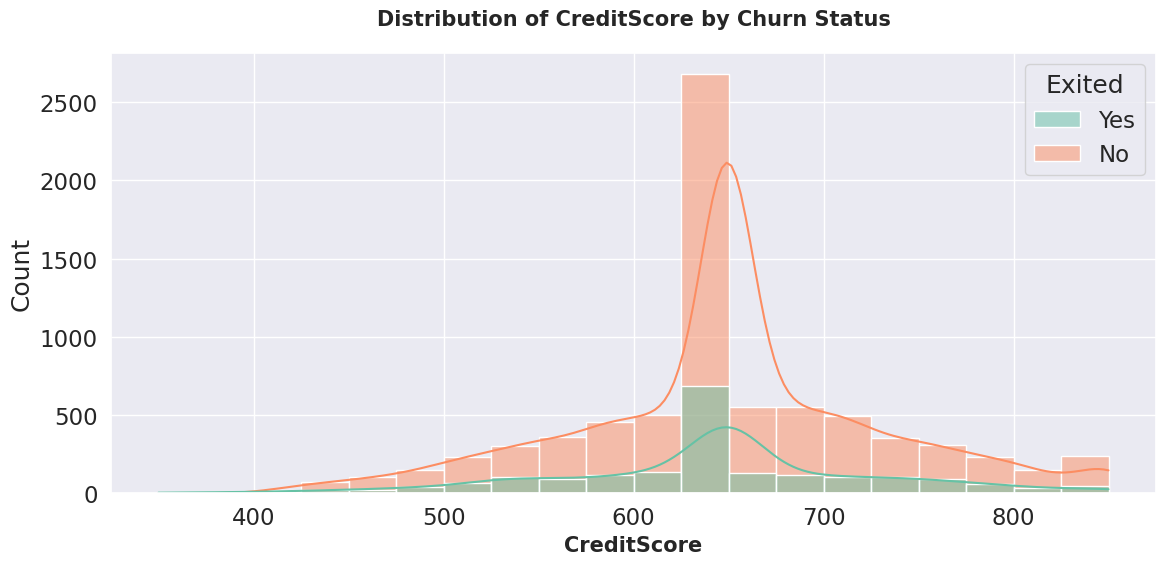

In [146]:
continous_plot("CreditScore")

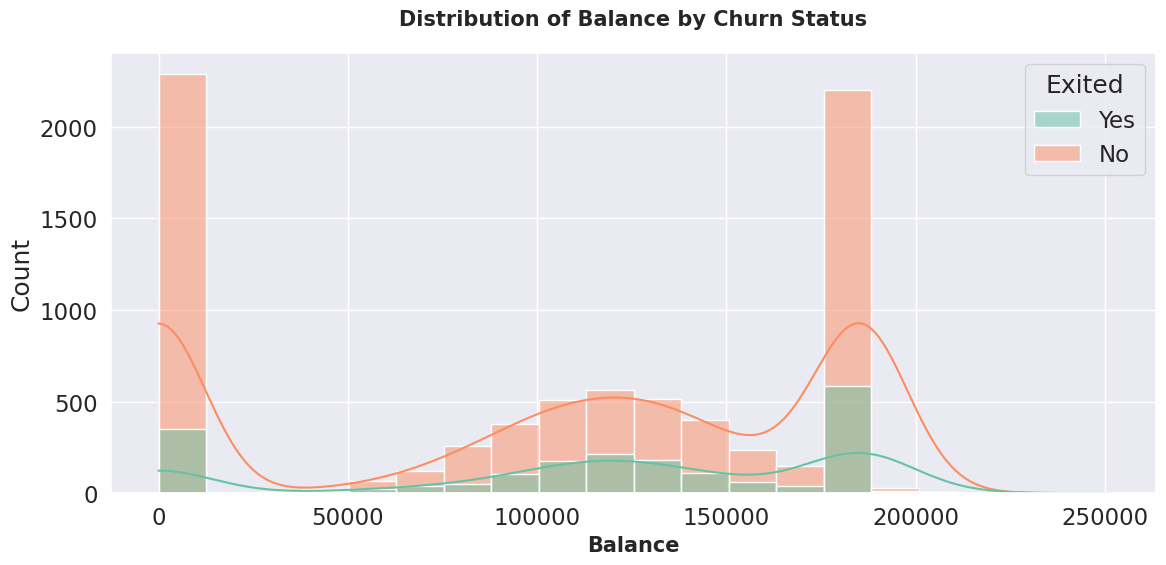

In [147]:
continous_plot("Balance")

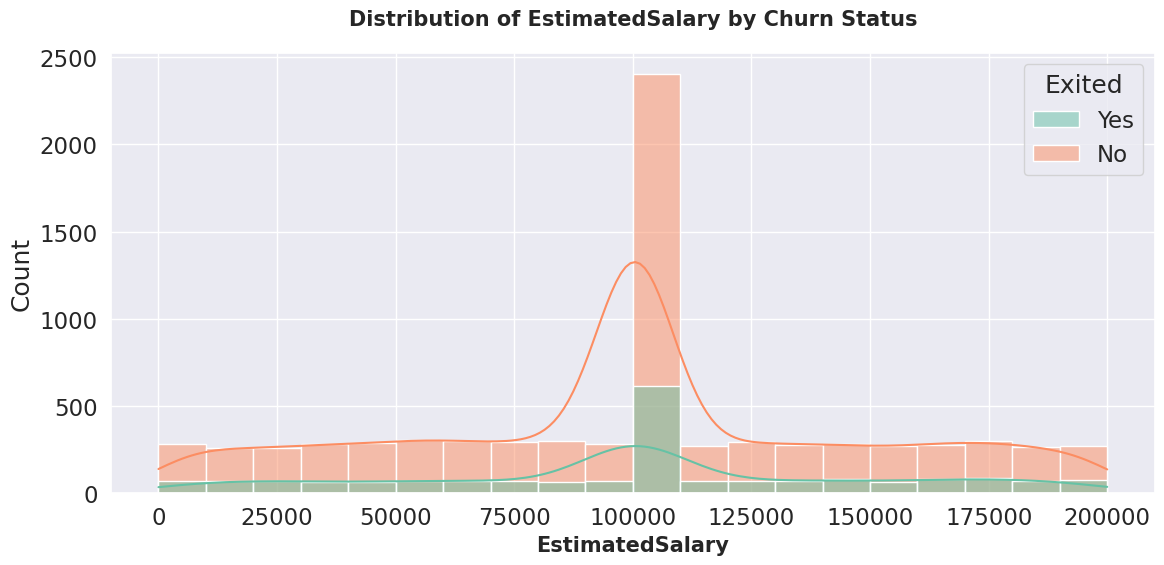

In [148]:
continous_plot("EstimatedSalary" )

# ===========================================

## Data Preprocessing.
### * Variable Selection and Importance.
### * Feature Transformation , Scaling and Encoding.
### * Splitting Data for Model Training.
### * Applying SMOTE to reduce class-imbalance.

Creating New Feature From "NumOfProducts" & Balance Features.


In [149]:
Customer_Churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [150]:
con=[(Customer_Churn["NumOfProducts"]==1),(Customer_Churn["NumOfProducts"]==2),(Customer_Churn["NumOfProducts"]>2)]
values=["One product","Two products","More than two products"]
# Provide a string as a default value to avoid the TypeError
Customer_Churn["NumOfProducts"]=np.select(con,values, default='Other')


In [151]:
Customer_Churn["NumOfProducts"].unique()

array(['One product', 'More than two products', 'Two products'],
      dtype=object)

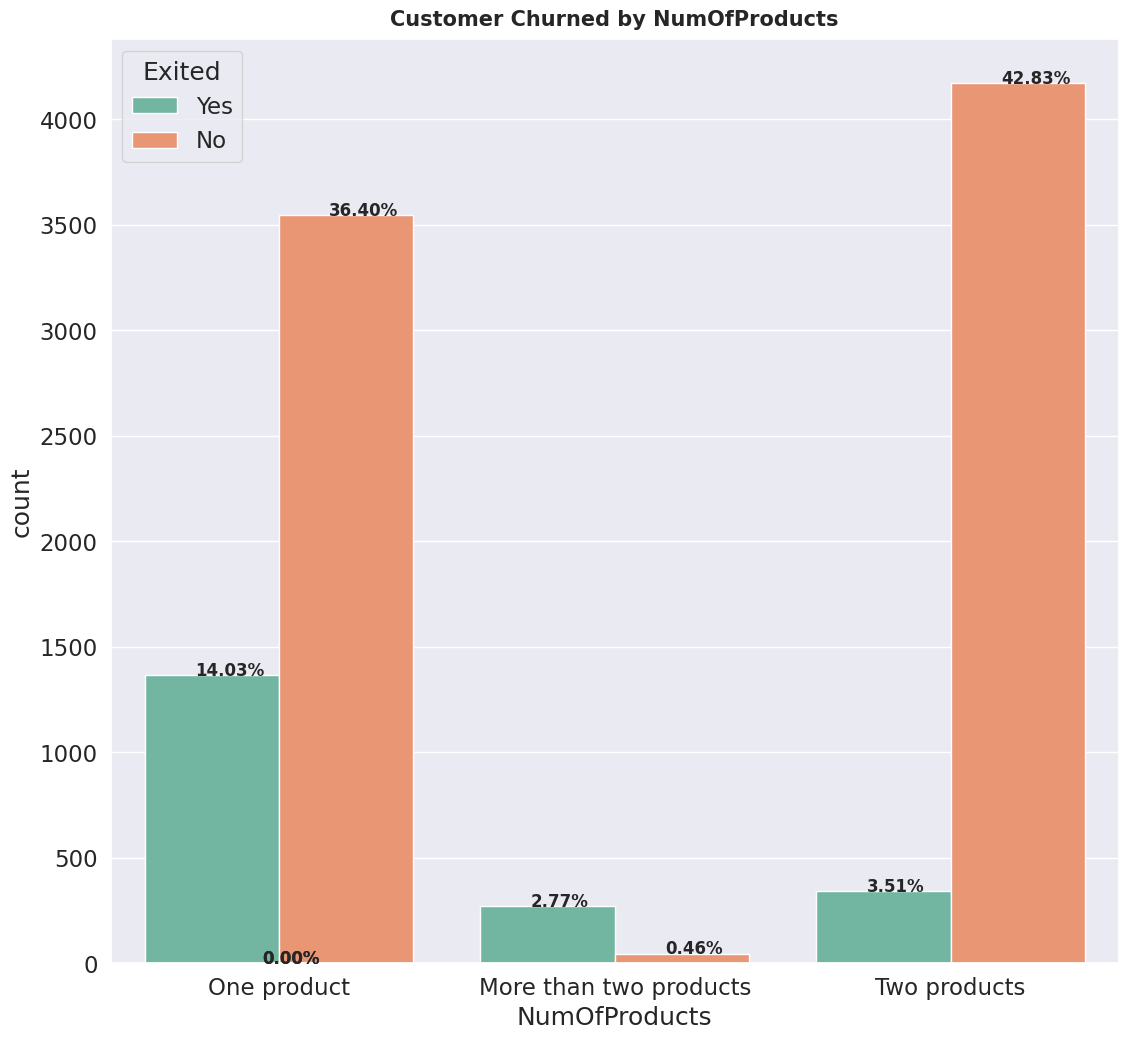

In [156]:
fig, axes = plt.subplots(1, 1, figsize=(13,12))
countplot("NumOfProducts",axes)

In [158]:
con=[(Customer_Churn["Balance"]==0),(Customer_Churn["Balance"]>0)]
values=["Zero Balance","Have Balance"]
Customer_Churn["Balance"]=np.select(con,values, default='Other')



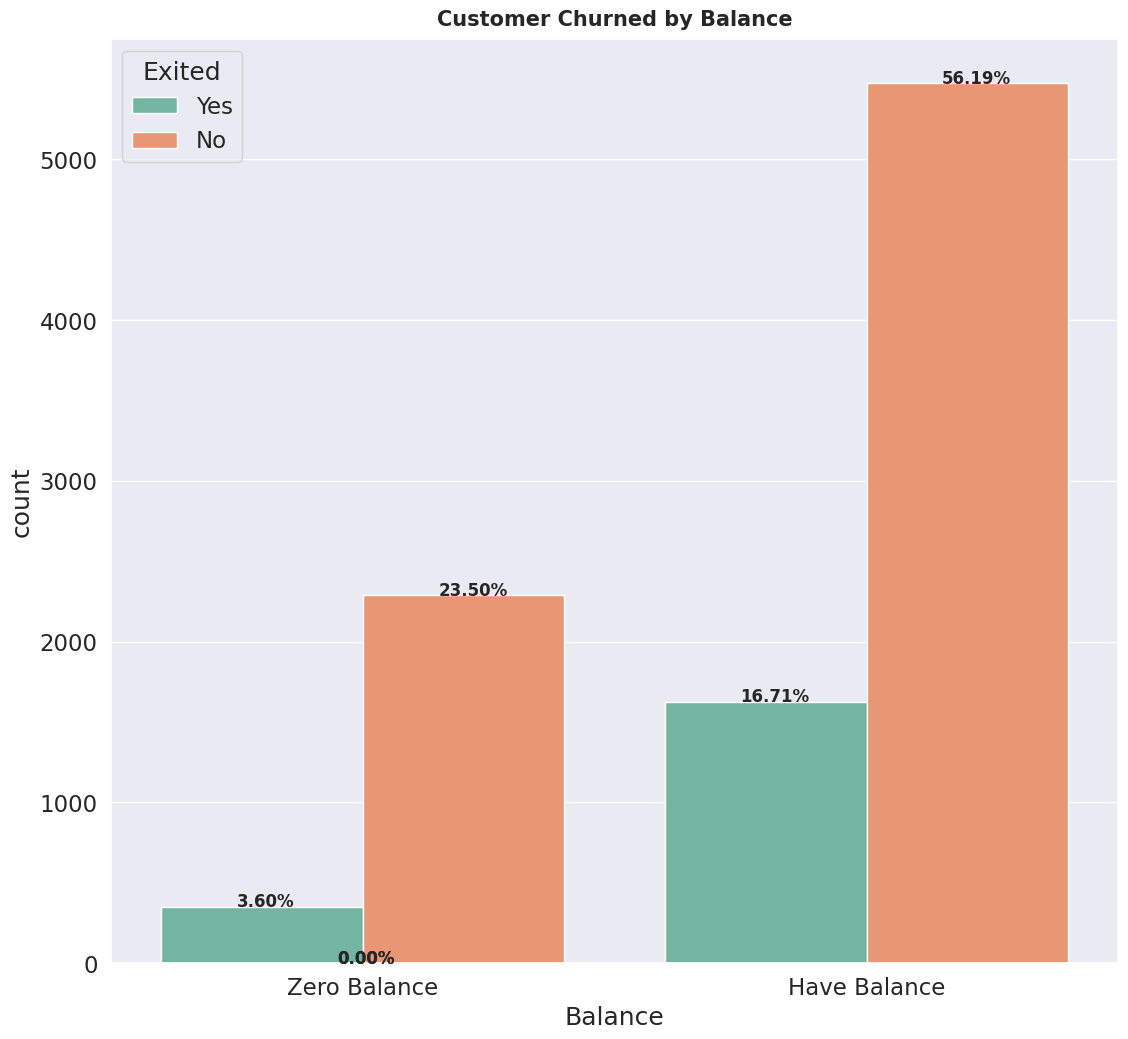

In [159]:
fig, axes = plt.subplots(1, 1, figsize=(13,12))
countplot("Balance",axes)

In [162]:
cat_cols=['Geography', 'Gender', 'Balance', 'NumOfProducts']
for col in cat_cols:
    print(f"Unique values in{col} : {Customer_Churn[col].unique()}")

Unique values inGeography : ['France' 'Spain' 'Germany']
Unique values inGender : ['Female' 'Male']
Unique values inBalance : ['Zero Balance' 'Have Balance']
Unique values inNumOfProducts : ['One product' 'More than two products' 'Two products']


In [163]:
Customer_Churn=pd.get_dummies(columns=cat_cols,data=Customer_Churn)

In [167]:
Customer_Churn["Exited"].replace({"Yes":1,"No":0},inplace=True)

In [169]:
Customer_Churn.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [170]:
Customer_Churn.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Balance_Have Balance,Balance_Zero Balance,NumOfProducts_More than two products,NumOfProducts_One product,NumOfProducts_Two products
0,649.291913,42.000000,2,1,1,100441.070469,1,True,False,False,True,False,False,True,False,True,False
1,608.000000,41.000000,1,0,1,112542.580000,0,False,False,True,True,False,True,False,False,True,False
2,502.000000,42.000000,8,1,0,113931.570000,1,True,False,False,True,False,True,False,True,False,False
3,699.000000,39.000000,1,0,0,93826.630000,0,True,False,False,True,False,True,False,False,False,True
4,850.000000,38.900082,2,1,1,79084.100000,0,False,False,True,True,False,True,False,False,True,False


In [171]:
cols=["CreditScore","Age","EstimatedSalary"]
Customer_Churn[cols].skew().to_frame().rename(columns={0:"EstimatedSalary"})

,EstimatedSalary
CreditScore,-0.068419
Age,1.194368
EstimatedSalary,-0.002485


In [176]:
old_age = Customer_Churn["Age"]
Customer_Churn["Age"] = np.log(Customer_Churn["Age"])


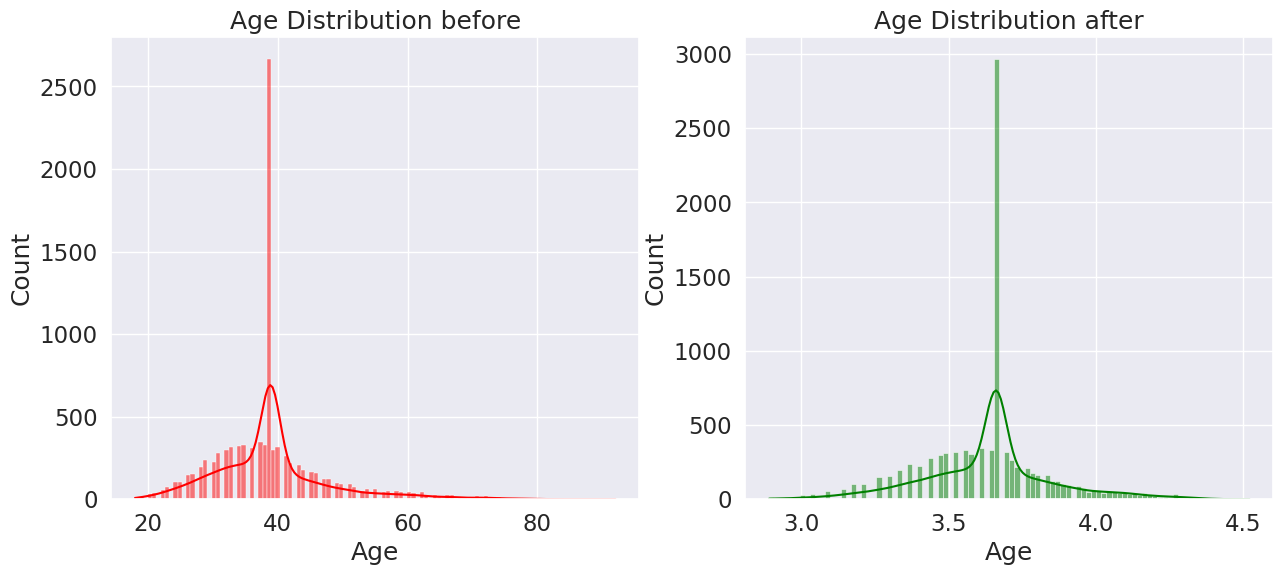

In [180]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(old_age,kde=True,color="red")
plt.title("Age Distribution before")
plt.subplot(1,2,2)
sns.histplot(Customer_Churn["Age"],kde=True,color="green")
plt.title("Age Distribution after")
plt.show()

## Select th features & labels and Splitting Data for Model Training.


In [181]:
X=Customer_Churn.drop(columns="Exited")
y=Customer_Churn["Exited"]

In [186]:
X.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Balance_Have Balance,Balance_Zero Balance,NumOfProducts_More than two products,NumOfProducts_One product,NumOfProducts_Two products
0,649.291913,3.737670,2,1,1,100441.070469,True,False,False,True,False,False,True,False,True,False
1,608.000000,3.713572,1,0,1,112542.580000,False,False,True,True,False,True,False,False,True,False
2,502.000000,3.737670,8,1,0,113931.570000,True,False,False,True,False,True,False,True,False,False
3,699.000000,3.663562,1,0,0,93826.630000,True,False,False,True,False,True,False,False,False,True
4,850.000000,3.660996,2,1,1,79084.100000,False,False,True,True,False,True,False,False,True,False


In [187]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [193]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [194]:
print("Shape of x_train is:",X_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (7304, 16)
Shape of x_test is:  (2435, 16)
Shape of y_train is: (7304,)
Shape of y_test is:  (2435,)


Applying SMOTE to Overcome the Class-Imbalance in Target Variable

In [195]:
smt=SMOTE(random_state=42)

In [196]:
x_train_smt,y_train_smt=smt.fit_resample(X_train,y_train)

In [197]:
print(x_train_smt.shape,y_train_smt.shape)

(11646, 16) (11646,)


In [198]:
y_train_smt.value_counts()

,count
Exited,
0,5823
1,5823


In [201]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_smt)
X_test_scaled = scaler.transform(x_test)

In [202]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [203]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_smt)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.8287
KNN: 0.8144
Decision Tree: 0.7630
Random Forest: 0.8292
SVM: 0.8312
XGBoost: 0.8271


In [205]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"BEST MODEL = {best_model_name} with Accuracy = {results[best_model_name]:.4f}")


BEST MODEL = SVM with Accuracy = 0.8312
